In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [3]:
df = pd.read_csv("Mobile Price Factors.csv")
df.head()

,Battery Power,Display Size,Sim count,Front camera max MP,Front camera count,Primary camera max MP,Primary camera count,Internal Memory,Mobile Depth,Mobile Height,...,Mobile Color,Mobile Brand,Processor Speed,Networks,Core,OS,Ram,Resolution x,Resolution y,Mobile Price
0,5000,16.56,2,5,1,12,3,32,8.95,164.4,...,24,58,2.0,4,8,10,3,720,1600,8999
1,5000,16.56,2,5,1,12,3,32,8.95,164.4,...,1,58,2.0,4,8,10,3,720,1600,8999
2,5000,16.56,2,5,1,12,3,64,8.95,164.4,...,1,58,2.0,4,8,10,4,720,1600,9999
3,5000,16.56,2,5,1,12,3,64,8.95,164.4,...,24,58,2.0,4,8,10,4,720,1600,9999
4,5000,16.51,2,16,1,48,4,128,9.00,164.4,...,10,57,2.0,4,8,10,4,720,1600,11999


In [4]:
df.columns

Index(['Battery Power', 'Display Size', 'Sim count', 'Front camera max MP',
       'Front camera count', 'Primary camera max MP', 'Primary camera count',
       'Internal Memory', 'Mobile Depth', 'Mobile Height', 'Mobile Width',
       'Mobile Weight', 'Mobile Color', 'Mobile Brand', 'Processor Speed',
       'Networks', 'Core', 'OS', 'Ram', 'Resolution x', 'Resolution y',
       'Mobile Price'],
      dtype='object')

In [5]:
y = df["Mobile Price"]
X = df.loc[:, df.columns!='Mobile Price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=1) 

In [7]:
model = SVR()
scale = StandardScaler()
pipe = Pipeline([('scaler', scale),('svr', model)])

In [8]:
param = {'svr__kernel' : ['linear'] ,'svr__C' : range(50,501,50),'svr__degree' : [3,8],'svr__epsilon' : [0.1,10,5,1],'svr__gamma' : ('auto','scale')}
linear = GridSearchCV(estimator = pipe, param_grid = param, 
                          cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs = -1, verbose = 2)
linear.fit(X_train,y_train)
print(linear.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'svr__C': 450, 'svr__degree': 3, 'svr__epsilon': 0.1, 'svr__gamma': 'auto', 'svr__kernel': 'linear'}


In [11]:
param = {'svr__kernel' : ['poly'] ,'svr__C' : range(50,501,50),'svr__degree' : [3,8],'svr__epsilon' : [0.1,10,5,1],'svr__gamma' : ('auto','scale')}
poly = GridSearchCV(estimator = pipe, param_grid = param, 
                          cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs = -1, verbose = 2)
poly.fit(X_train,y_train)
print(poly.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'svr__C': 500, 'svr__degree': 3, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'poly'}


In [12]:
param = {'svr__kernel' : ['rbf'] ,'svr__C' : range(50,501,50),'svr__degree' : [3,8],'svr__epsilon' : [0.1,10,5,1],'svr__gamma' : ('auto','scale')}
rbf = GridSearchCV(estimator = pipe, param_grid = param, 
                          cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs = -1, verbose = 2)
rbf.fit(X_train,y_train)
print(rbf.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'svr__C': 500, 'svr__degree': 3, 'svr__epsilon': 0.1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}


In [13]:
param = {'svr__kernel' : ['sigmoid'] ,'svr__C' : range(50,501,50),'svr__degree' : [3,8],'svr__epsilon' : [0.1,10,5,1],'svr__gamma' : ('auto','scale')}
sigmoid = GridSearchCV(estimator = pipe, param_grid = param, 
                          cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs = -1, verbose = 2)
sigmoid.fit(X_train,y_train)
print(sigmoid.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'svr__C': 400, 'svr__degree': 3, 'svr__epsilon': 10, 'svr__gamma': 'auto', 'svr__kernel': 'sigmoid'}


In [14]:
linear_pre = linear.predict(X_test)
poly_pre = poly.predict(X_test)
rbf_pre = rbf.predict(X_test)
sigmoid_pre = sigmoid.predict(X_test)

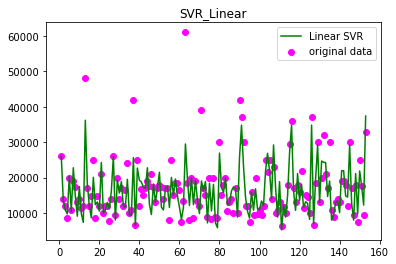

In [15]:
# Visualization
x = range(1,len(linear_pre)+1)
plt.plot(x, linear_pre, color = 'green')
plt.scatter(x,y_test,color = 'magenta')
plt.title('SVR_Linear')
plt.legend(['Linear SVR','original data'])
plt.show()

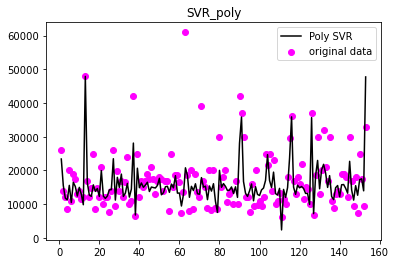

In [16]:
plt.plot(x, poly_pre, color = 'black')
plt.scatter(x,y_test,color = 'magenta')
plt.title('SVR_poly')
plt.legend(['Poly SVR','original data'])
plt.show()

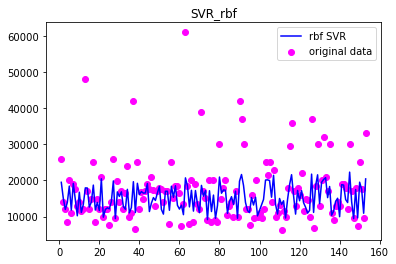

In [17]:
plt.plot(x, rbf_pre, color = 'blue')
plt.scatter(x,y_test,color = 'magenta')
plt.title('SVR_rbf')
plt.legend(['rbf SVR','original data'])
plt.show()

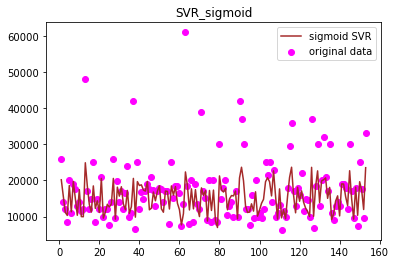

In [18]:
plt.plot(x, sigmoid_pre, color = 'brown')
plt.scatter(x,y_test,color = 'magenta')
plt.title('SVR_sigmoid')
plt.legend(['sigmoid SVR','original data'])
plt.show()

In [19]:
print(sqrt(mean_squared_error(y_test,poly_pre)))
print(r2_score(y_test,poly_pre))
print(np.mean(np.abs((y_test - poly_pre)/y_test)))

5549.88878936984
0.5748079607600209
0.19097423968997135


In [20]:
print(sqrt(mean_squared_error(y_test,linear_pre)))
print(r2_score(y_test,linear_pre))
print(np.mean(np.abs((y_test - linear_pre)/y_test)))

4797.992121551048
0.6822133678598801
0.16528175136856882


In [21]:
print(sqrt(mean_squared_error(y_test,rbf_pre)))
print(r2_score(y_test,rbf_pre))
print(np.mean(np.abs((y_test - rbf_pre)/y_test)))

6594.779477343071
0.39963257655555606
0.19217944821741978


In [22]:
print(sqrt(mean_squared_error(y_test,sigmoid_pre)))
print(r2_score(y_test,sigmoid_pre))
print(np.mean(np.abs((y_test - sigmoid_pre)/y_test)))

6122.5727850764215
0.48253083413345255
0.1841704119802018


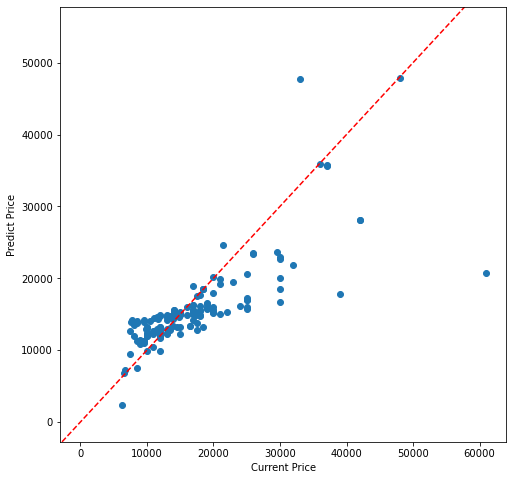

In [25]:
#poly kernal
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, poly_pre)
ax.axline(xy1=(0, 0), xy2=(55000, 55000), linestyle='--', color='red')
ax.set_xlabel('Current Price')
ax.set_ylabel('Predict Price')
plt.show()

# High tier

In [26]:
high_tier = df[df['Mobile Price'] >= 17999]

In [27]:
high_y = high_tier["Mobile Price"]
high_X = high_tier.loc[:, high_tier.columns!='Mobile Price']
hX_train, hX_test, hy_train, hy_test = train_test_split(high_X,high_y, test_size=1/3, random_state=1) 

In [28]:
model = SVR()
scale = StandardScaler()
highpipe = Pipeline([('scaler', scale),('svr', model)])

In [29]:
param = {'svr__kernel' : ['linear','poly','rbf','sigmoid'] ,'svr__C' : range(50,501,50),'svr__degree' : [3,8],'svr__coef0' : [0.01,10,0.5],'svr__gamma' : ('auto','scale')}
high = GridSearchCV(estimator = highpipe, param_grid = param, 
                          cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs = -1, verbose = 2)
high.fit(hX_train,hy_train)
print(high.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
{'svr__C': 450, 'svr__coef0': 10, 'svr__degree': 3, 'svr__gamma': 'scale', 'svr__kernel': 'poly'}


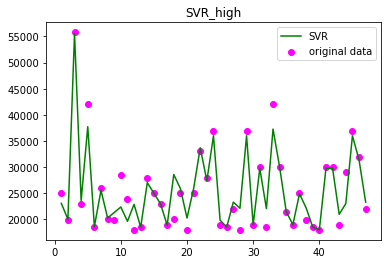

In [30]:
high_pre = high.predict(hX_test)
x = range(1,len(high_pre)+1)
plt.plot(x, high_pre, color = 'green')
plt.scatter(x,hy_test,color = 'magenta')
plt.title('SVR_high')
plt.legend(['SVR','original data'])
plt.show()

In [32]:
print(sqrt(mean_squared_error(hy_test,high_pre)))
print(r2_score(hy_test,high_pre))
print(np.mean(np.abs((hy_test - high_pre)/hy_test)))

2489.489856518966
0.9017052861837324
0.06263766200092644


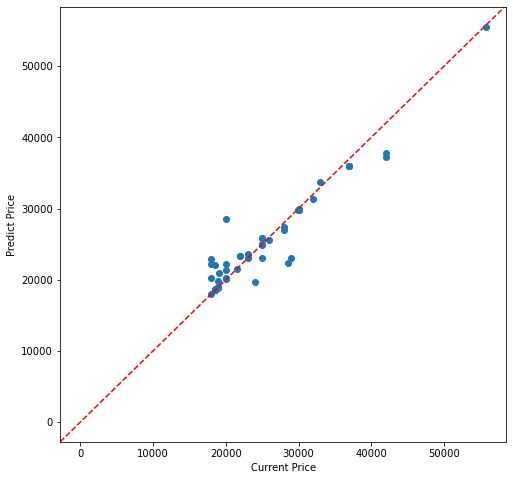

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(hy_test, high_pre)
ax.axline(xy1=(0, 0), xy2=(55000, 55000), linestyle='--', color='red')
ax.set_xlabel('Current Price')
ax.set_ylabel('Predict Price')
plt.show()

# Middle tier

In [34]:
middle_tier = df[(df['Mobile Price'] < 17999) & (df['Mobile Price'] >= 11985.2)]

In [35]:
middle_y = middle_tier["Mobile Price"]
middle_X = middle_tier.loc[:, middle_tier.columns!='Mobile Price']
mX_train, mX_test, my_train, my_test = train_test_split(middle_X,middle_y, test_size=1/3, random_state=1) 

In [36]:
model = SVR()
scale = StandardScaler()
middlepipe = Pipeline([('scaler', scale),('svr', model)])

In [37]:
middle = GridSearchCV(estimator = middlepipe, param_grid = param, 
                          cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs = -1, verbose = 2)
middle.fit(mX_train,my_train)
print(middle.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
{'svr__C': 150, 'svr__coef0': 0.01, 'svr__degree': 3, 'svr__gamma': 'auto', 'svr__kernel': 'linear'}


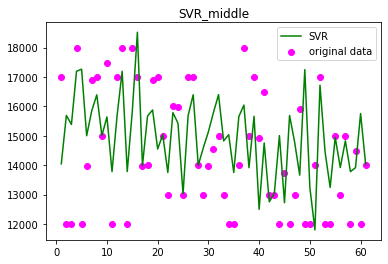

In [38]:
middle_pre = middle.predict(mX_test)
x = range(1,len(middle_pre)+1)
plt.plot(x, middle_pre, color = 'green')
plt.scatter(x,my_test,color = 'magenta')
plt.title('SVR_middle')
plt.legend(['SVR','original data'])
plt.show()

In [39]:
print(sqrt(mean_squared_error(my_test,middle_pre)))
print(r2_score(my_test,middle_pre))
print(np.mean(np.abs((my_test - middle_pre)/my_test)))

1942.3708666183793
0.08597313894025937
0.11168155658582381


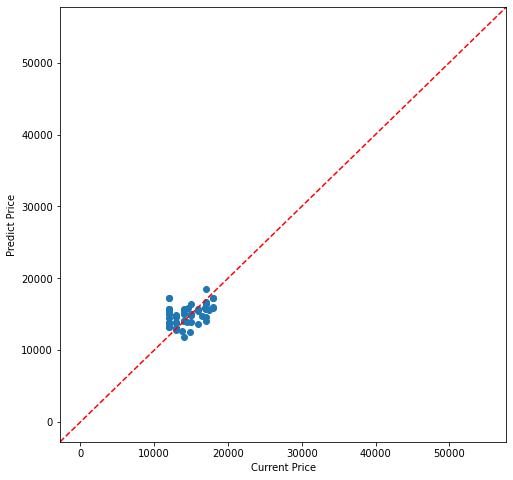

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(my_test, middle_pre)
ax.axline(xy1=(0, 0), xy2=(55000, 55000), linestyle='--', color='red')
ax.set_xlabel('Current Price')
ax.set_ylabel('Predict Price')
plt.show()

# Low tier

In [41]:
low_tier = df[df['Mobile Price'] < 11985.2]

In [42]:
low_y = low_tier["Mobile Price"]
low_X = low_tier.loc[:, low_tier.columns!='Mobile Price']
lX_train, lX_test, ly_train, ly_test = train_test_split(low_X,low_y, test_size=1/3, random_state=1) 

In [43]:
model = SVR()
scale = StandardScaler()
lowpipe = Pipeline([('scaler', scale),('svr', model)])

In [44]:
low = GridSearchCV(estimator = lowpipe, param_grid = param, 
                          cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs = -1, verbose = 2)
low.fit(lX_train,ly_train)
print(low.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
{'svr__C': 100, 'svr__coef0': 10, 'svr__degree': 3, 'svr__gamma': 'scale', 'svr__kernel': 'poly'}


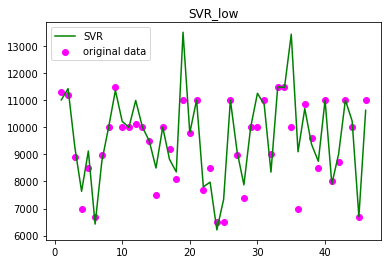

In [45]:
low_pre = low.predict(lX_test)
x = range(1,len(low_pre)+1)
plt.plot(x, low_pre, color = 'green')
plt.scatter(x,ly_test,color = 'magenta')
plt.title('SVR_low')
plt.legend(['SVR','original data'])
plt.show()

In [46]:
print(sqrt(mean_squared_error(ly_test,low_pre)))
print(r2_score(ly_test,low_pre))
print(np.mean(np.abs((ly_test - low_pre)/ly_test)))

799.9028011493259
0.7187023331864867
0.04846813479496425


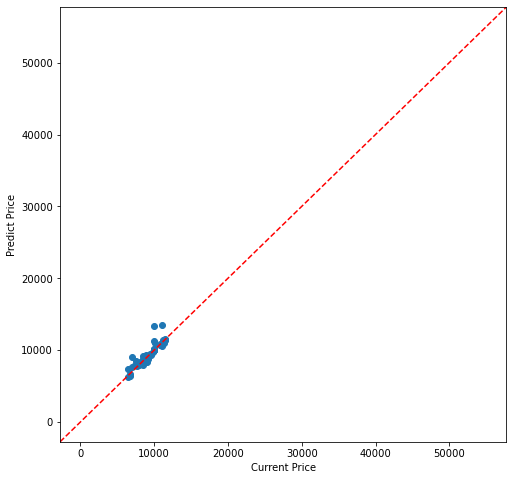

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(ly_test, low_pre)
ax.axline(xy1=(0, 0), xy2=(55000, 55000), linestyle='--', color='red')
ax.set_xlabel('Current Price')
ax.set_ylabel('Predict Price')
plt.show()